In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import sys
sys.path.append("../ComSub")
from ECI  import *
import re
from collections import defaultdict, Counter
p1 = re.compile(r'[<](.*?)[>]', re.S)  #最小匹配

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("./Posts_phys.csv")

In [4]:
data.head()

,PostTypeId,Id,OwnerUserId,CreationDate,AcceptedAnswerId,Tags,ParentId,Score,CommentCount,ViewCount,AnswerCount,FavoriteCount,Title,Body
0,1,1,7.0,2010-11-02T18:59:01.140,5.0,<quantum-mechanics><particle-physics><angular-...,NaN,68,5,12383.0,4.0,23.0,What is spin as it relates to subatomic partic...,<p>I often hear about subatomic particles havi...
1,1,2,23.0,2010-11-02T19:09:48.680,5704.0,<particle-physics><string-theory>,NaN,27,3,2276.0,4.0,8.0,What is your simplest explanation of the strin...,<p>How would you explain string theory to non ...
2,1,3,40.0,2010-11-02T19:11:05.857,180.0,<particle-physics><group-theory><representatio...,NaN,32,5,2113.0,3.0,12.0,"Lie theory, Representations and particle physics",<p>This is a question that has been posted at ...
3,2,4,20.0,2010-11-02T19:12:26.543,NaN,NaN,1.0,19,2,NaN,NaN,NaN,NaN,<p>Imagine going to the rest frame of a massiv...
4,2,5,13.0,2010-11-02T19:15:20.813,NaN,NaN,1.0,42,0,NaN,NaN,NaN,NaN,<p>Spin is a technical term specifically refer...


存在的关系
- 提问者-问题 
- 回答者-问题
- 回答者-tag的关系

In [5]:
#找到所有的问题和回答
Question = data[data.PostTypeId==1]
Answer = data[data.PostTypeId==2]

In [6]:
Question =  Question.dropna(subset=["OwnerUserId"])
Answer =  Answer.dropna(subset=["OwnerUserId","ParentId"])

In [10]:
#所有问题的标签
Qid_tags =  {Question.Id[i]:p1.findall(Question.Tags[i]) for i in Question.index}

In [8]:
# 所有标签的列表
taglist = list(set([t for i in Qid_tags for t in Qid_tags[i]]))
dtag = dict(zip(taglist,range(len(taglist))))

In [13]:
qid

214

In [14]:
AnswerUserTag = defaultdict(lambda:defaultdict(lambda: 0))
for i in Answer.index:
    user = Answer.OwnerUserId[i]
    qid = int(Answer.ParentId[i])
    if qid in Qid_tags:
        for tag in Qid_tags[qid]:
            AnswerUserTag[user][tag]+=1


In [15]:
user_tag = [[user,tag,AnswerUserTag[user][tag]] for user in AnswerUserTag for tag in  AnswerUserTag[user]]

In [16]:
x = [a for a,b,c in user_tag]
y = [b for a,b,c in user_tag]
z = [c for a,b,c in user_tag]

In [17]:
def get_dict(lst):
    return dict(zip(list(set(lst)),range(len(set(lst)))))



In [18]:
dx = get_dict(x)
dy = get_dict(y)
xlist = [dx[a] for a in x]
ylist = [dy[b] for b in y]

In [19]:
from scipy import sparse
nx,ny=len(dx),len(dy)
M = sparse.csc_matrix((z,(xlist,ylist)),shape=(nx,ny))

In [126]:
R = RCA_sparse(M)
D = Get_eci_pci_sparse(R)

==Time 4.81==
==Time 1.11==


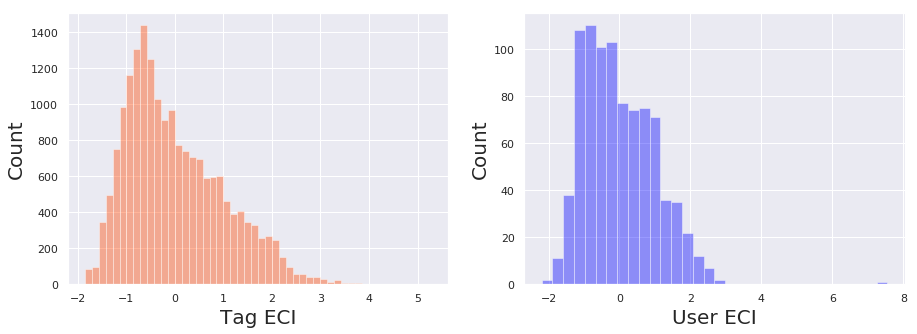

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(D['eci'],kde=False,color="orangered",)
plt.xlabel('Tag ECI',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(122)
sns.distplot(D['pci'],kde=False,color="blue",)
plt.xlabel('User ECI',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [22]:
res = [(key,D['pci'][dy[key]]) for key in dy]
Res = sorted(res,key=lambda  x:x[1],reverse=True)
Res[:20]

[('quantum-error-correction', 7.553216916149848),
 ('affine-lie-algebra', 2.842143689317641),
 ('superspace-formalism', 2.726609441356291),
 ('large-n', 2.6706855675306125),
 ('algebraic-topology', 2.660627782357994),
 ('amplituhedron', 2.591626865758314),
 ('sigma-models', 2.544280324490543),
 ('brst', 2.5326251829366355),
 ('topological-defects', 2.523704399259207),
 ('skyrmion', 2.4919753597065255),
 ('hopf-algebra', 2.3265148653033103),
 ('ghosts', 2.2978246073683906),
 ('wightman-fields', 2.2302991654454236),
 ('non-commutative-theory', 2.1846911013098613),
 ('spin-liquid', 2.154246206988117),
 ('spin-ice', 2.1542462069881156),
 ('string-field-theory', 2.137490330329409),
 ('superconformality', 2.1194725032270902),
 ('calabi-yau', 2.10606320245794),
 ('chern-simons-theory', 2.097715138242211)]

In [23]:
Res[-20:]

[('torque', -1.5159482303978797),
 ('lift', -1.52122132263421),
 ('electric-current', -1.5234472891187467),
 ('drag', -1.5333075958683775),
 ('building-physics', -1.5353283967085138),
 ('bernoulli-equation', -1.547977658670442),
 ('water', -1.54974650774621),
 ('contact-mechanics', -1.5911919976515545),
 ('aerodynamics', -1.6048213458595282),
 ('pressure', -1.6068651671468106),
 ('everyday-life', -1.6183821914077023),
 ('electricity', -1.6204428466849248),
 ('fluid-dynamics', -1.6272143583040595),
 ('electrical-resistance', -1.6478579849423507),
 ('free-body-diagram', -1.7140645810376824),
 ('electric-circuits', -1.725840361920602),
 ('friction', -1.7425325061359553),
 ('forces', -1.7447886344267305),
 ('newtonian-mechanics', -1.9127545773956525),
 ('fracture', -2.1970662024449745)]

# 利用userid-questionid

In [127]:
XY = [[int(Answer.OwnerUserId[i]), int(Answer.ParentId[i])] for i in Answer.index]

In [128]:
x = [i  for  i,j  in XY]
y = [j  for  i,j  in XY]

In [129]:
Cx = Counter(x)
Cy= Counter(y)

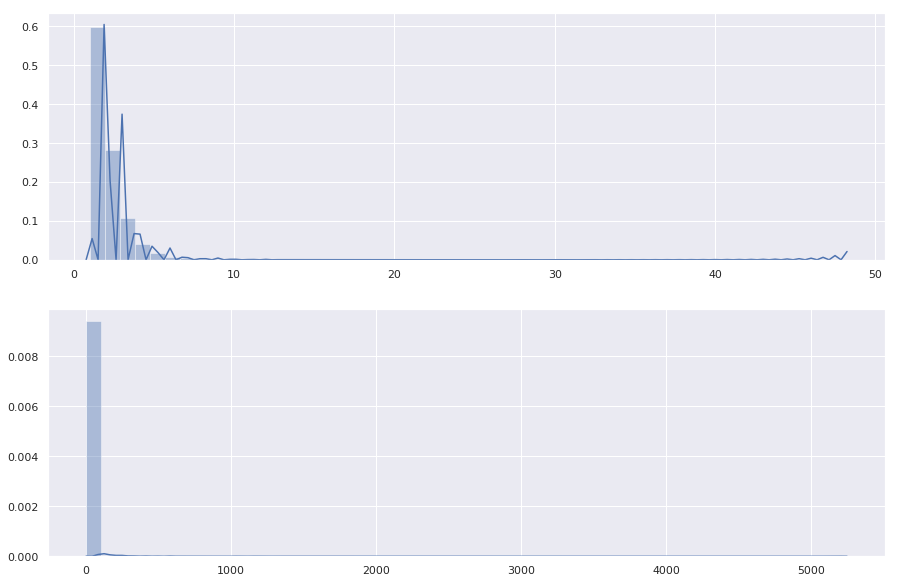

In [130]:
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.distplot(list(Cy.values()))
plt.subplot(212)
sns.distplot(list(Cx.values()))

In [131]:
removex = [i for i in Cx if Cx[i]<=1]
removey = [i for i in Cy if Cy[i]<=3]
XY1 = []
n=0
N=len(XY)
for xi,yi in XY:
    if xi not in removex and yi not in removey:
        XY1.append([xi,yi])
    n+=1
    if n%1000==0:
        print(n*1.0/N,end='\r')

In [132]:
x = [i  for  i,j  in XY1]
y = [j  for  i,j  in XY1]
dx = get_dict(x)
dy = get_dict(y)
xlist = [dx[a] for a in x]
ylist = [dy[b] for b in y]

In [133]:
len(dx),len(dy)

(4553, 6696)

In [105]:
@timelogger
def RCA_sparse(M):
    B = sparse.csc_matrix(M.sum(1)*M.sum(0))
    Sum = M.sum()
    R = sparse.lil_matrix(M*Sum/B)
    del B
    del Sum
    R[R>=1]=1
    R[R<1]=0
    R = R.tocsc()
    return R

In [134]:
nx,ny=len(dx),len(dy)
M = sparse.csc_matrix(([1.]*len(xlist),(xlist,ylist)),shape=(nx,ny))

In [108]:
R = RCA_sparse(M)
#D = Get_eci_pci_sparse(R)

/home/superman/anaconda3/lib/python3.7/site-packages/scipy/sparse/compressed.py:282: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


==Time 4.77==


In [135]:
D = Get_eci_pci_sparse(M)

==Time 1.03==


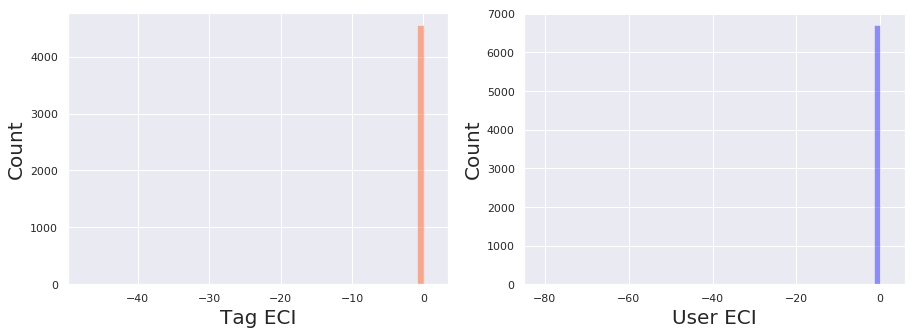

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(D['eci'],kde=False,color="orangered",)
plt.xlabel('Tag ECI',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(122)
sns.distplot(D['pci'],kde=False,color="blue",)
plt.xlabel('User ECI',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [136]:
SD =  sorted([[i,k]  for i,k in zip(range(len(D['pci'])),D['pci'])],key=lambda x:x[1],reverse=True)

In [137]:
qid = [i for i in dy.keys()]
qid2 = [dy[i] for i in qid]

In [138]:
id2origin=dict(zip(qid2,qid))

In [139]:
[[id2origin[i],j] for i,j  in SD[:6]]

[[27590, 53.061662115951364],
 [242126, 18.762171383949838],
 [95259, 0.0012325240683133667],
 [13466, 0.001232524068074649],
 [29985, 0.001232524068067608],
 [212986, 0.0012325240680553426]]

In [140]:
[[id2origin[i],j] for i,j  in SD[-6:]]

[[321957, 0.0012325240679892469],
 [103099, 0.001232524067970849],
 [296904, 0.001232524067941776],
 [165950, 0.001232524067901119],
 [86924, -27.334024635307326],
 [261603, -52.73785992782478]]

In [121]:
data.loc[data['Id']==261603]

,PostTypeId,Id,OwnerUserId,CreationDate,AcceptedAnswerId,Tags,ParentId,Score,CommentCount,ViewCount,AnswerCount,FavoriteCount,Title,Body
189433,1,261603,120609.0,2016-06-09T07:56:23.097,261610.0,<kinematics><integration><differentiation><cal...,NaN,1,0,609.0,4.0,NaN,Area under and slope of the motion graphs,<p>I wanted to ask in general what area under ...


In [ ]:
data.loc[data['Id']==27590]